## MISE EN PLACE DES DONNEES

In [38]:
# Importation des modules

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import pycatch22 as pyc

In [39]:
print(pd.__version__)

1.5.3


In [40]:
# Importation et manipulation des données

data = pd.read_excel('Data_Sechilienne_PYTHON.xlsx')

data = data.rename(columns={'Vitesse A13 (mm/jour)': 'vitesse'})
data = data.rename(columns = {'Pluie + neige (mm)\n=\nPluie brute (mm)': 'pluie_brute'})

variables = ['Date', 'vitesse', 'pluie_brute']

data = data[variables]

data['Date'] = pd.to_datetime(data['Date'])
data = data.set_index('Date')

print(data)

            vitesse  pluie_brute
Date                            
1992-10-06     0.25          4.7
1992-10-07     0.25          1.9
1992-10-08     0.80          0.1
1992-10-09     0.30          0.7
1992-10-10     0.00         32.1
...             ...          ...
2021-06-26     0.27          0.0
2021-06-27     0.28          0.0
2021-06-28     0.17          2.2
2021-06-29     0.35          0.3
2021-06-30     0.00          0.0

[10495 rows x 2 columns]


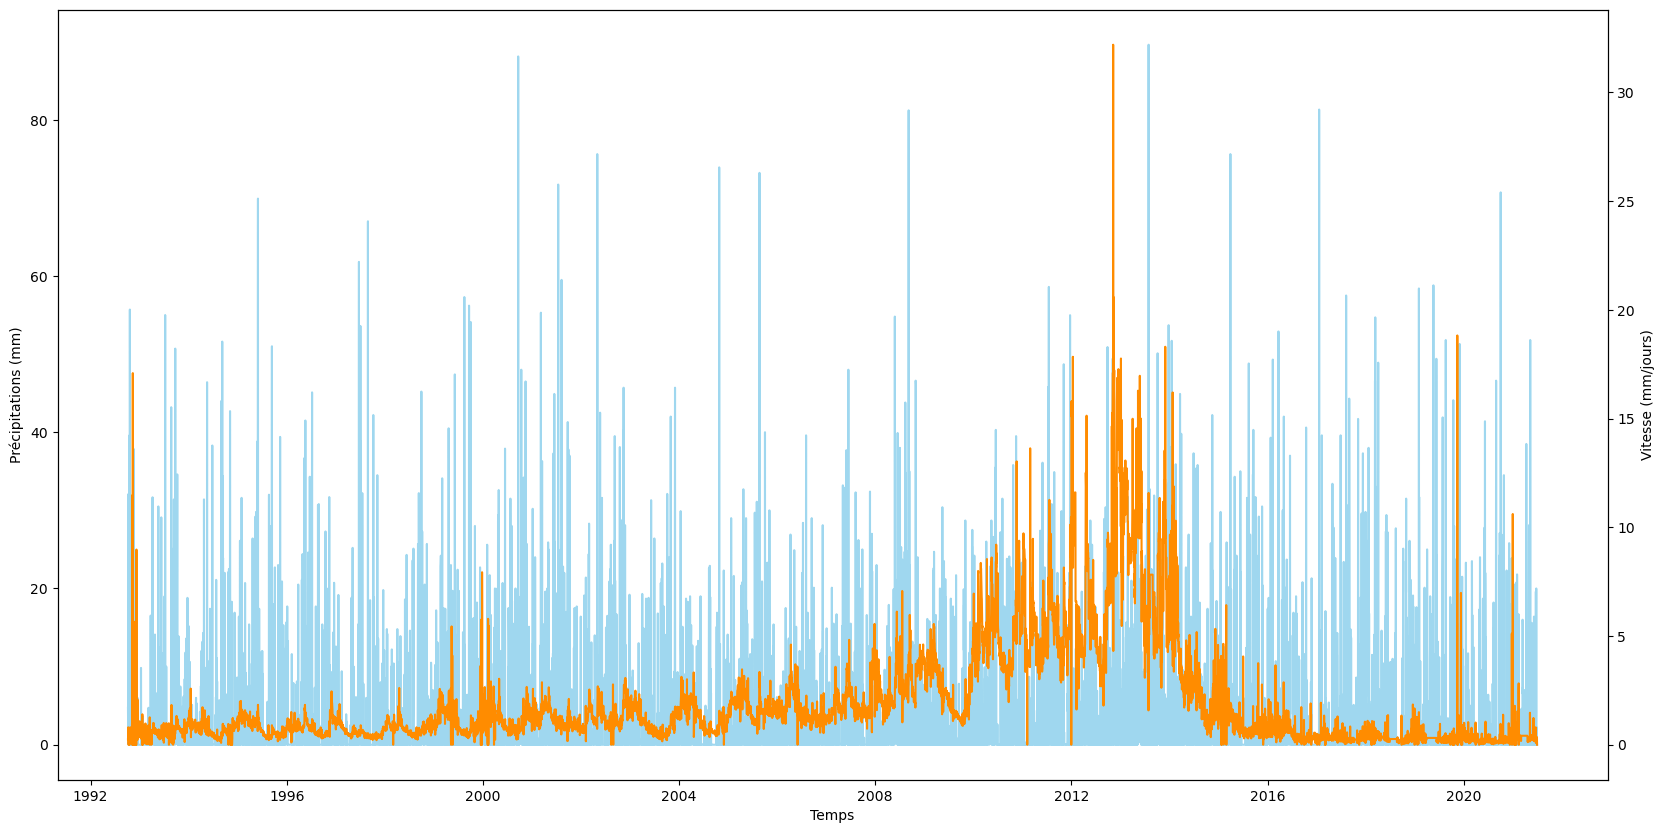

In [41]:
# Visualisation des données

fig, ax1 = plt.subplots(figsize = (20,10))

ax1.plot(data['pluie_brute'], label = 'Pluie brute', color = 'skyblue', alpha=0.8)
ax1.set_xlabel('Temps')
ax1.set_ylabel('Précipitations (mm)')

ax2 = ax1.twinx()

ax2.plot(data['vitesse'], label='Vitesse', color='darkorange')
ax2.set_ylabel('Vitesse (mm/jours)')

plt.show()

## VITESSE

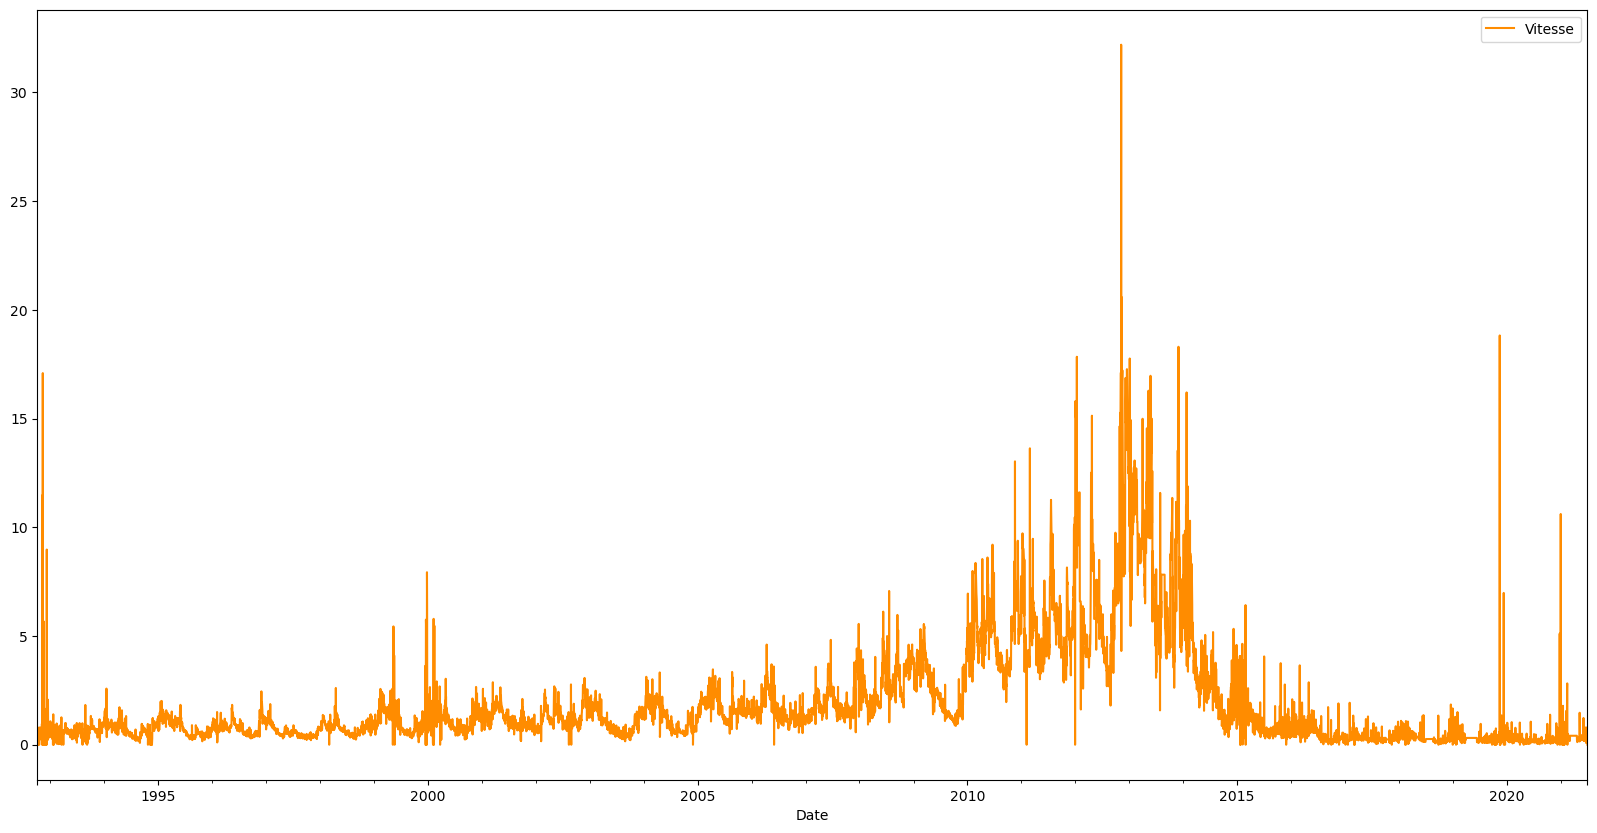

In [42]:
# Visualisation des données de déplacement 

plt.figure(figsize=(20,10))

data['vitesse'].plot(label='Vitesse', color='darkorange')

plt.legend()
plt.show()

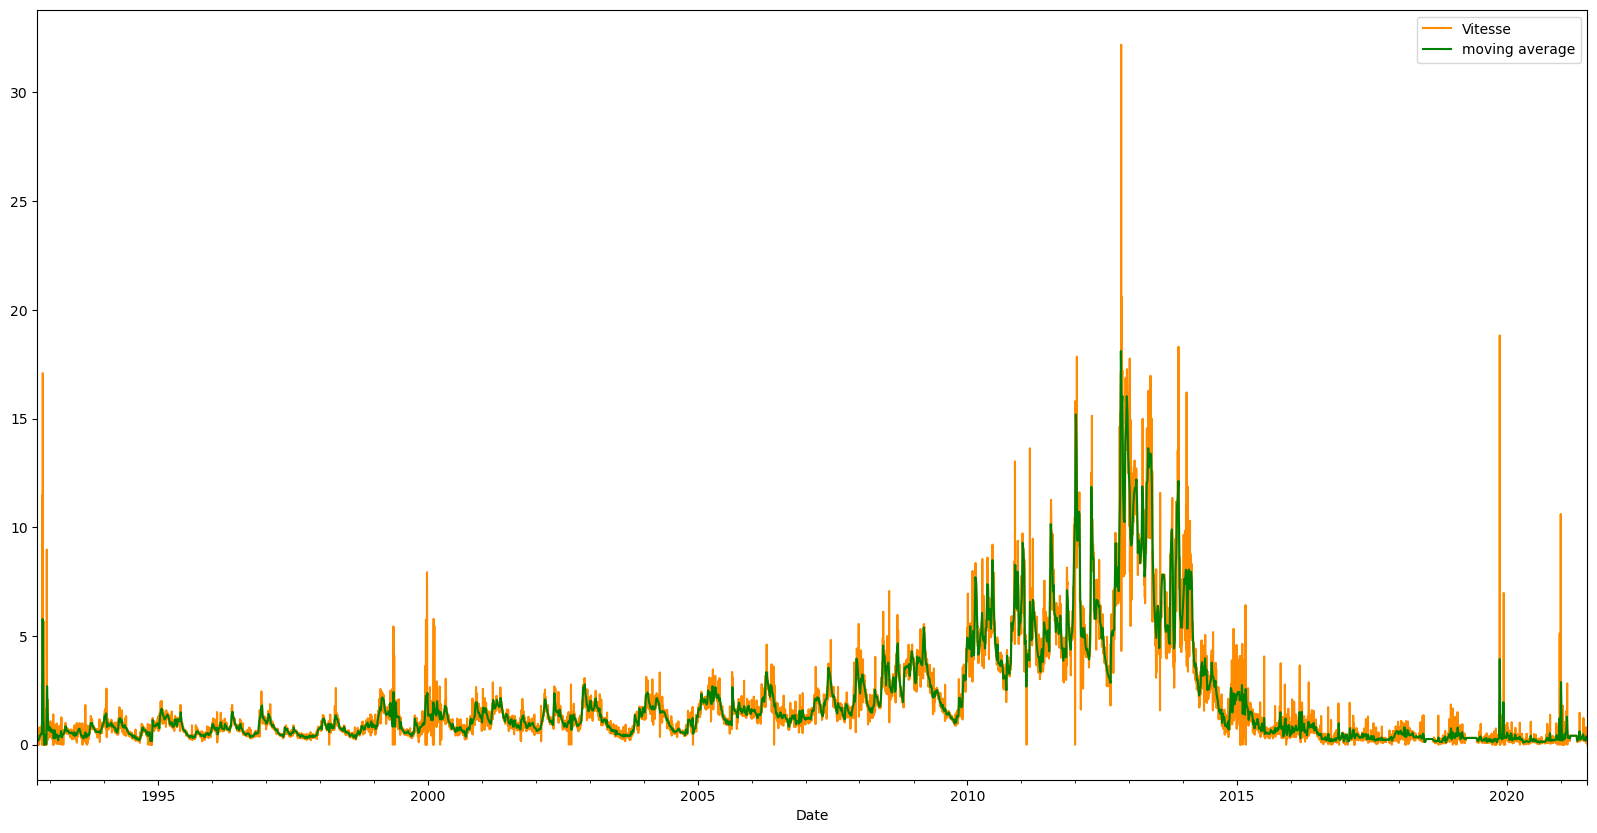

In [43]:
# Visusalisation déplacement + moving average

plt.figure(figsize=(20,10))

data['vitesse'].plot(label='Vitesse', color='darkorange')
data['vitesse'].rolling(window=5, center=True, step=5).mean().plot(label='moving average', color='green')

plt.legend()
plt.show()

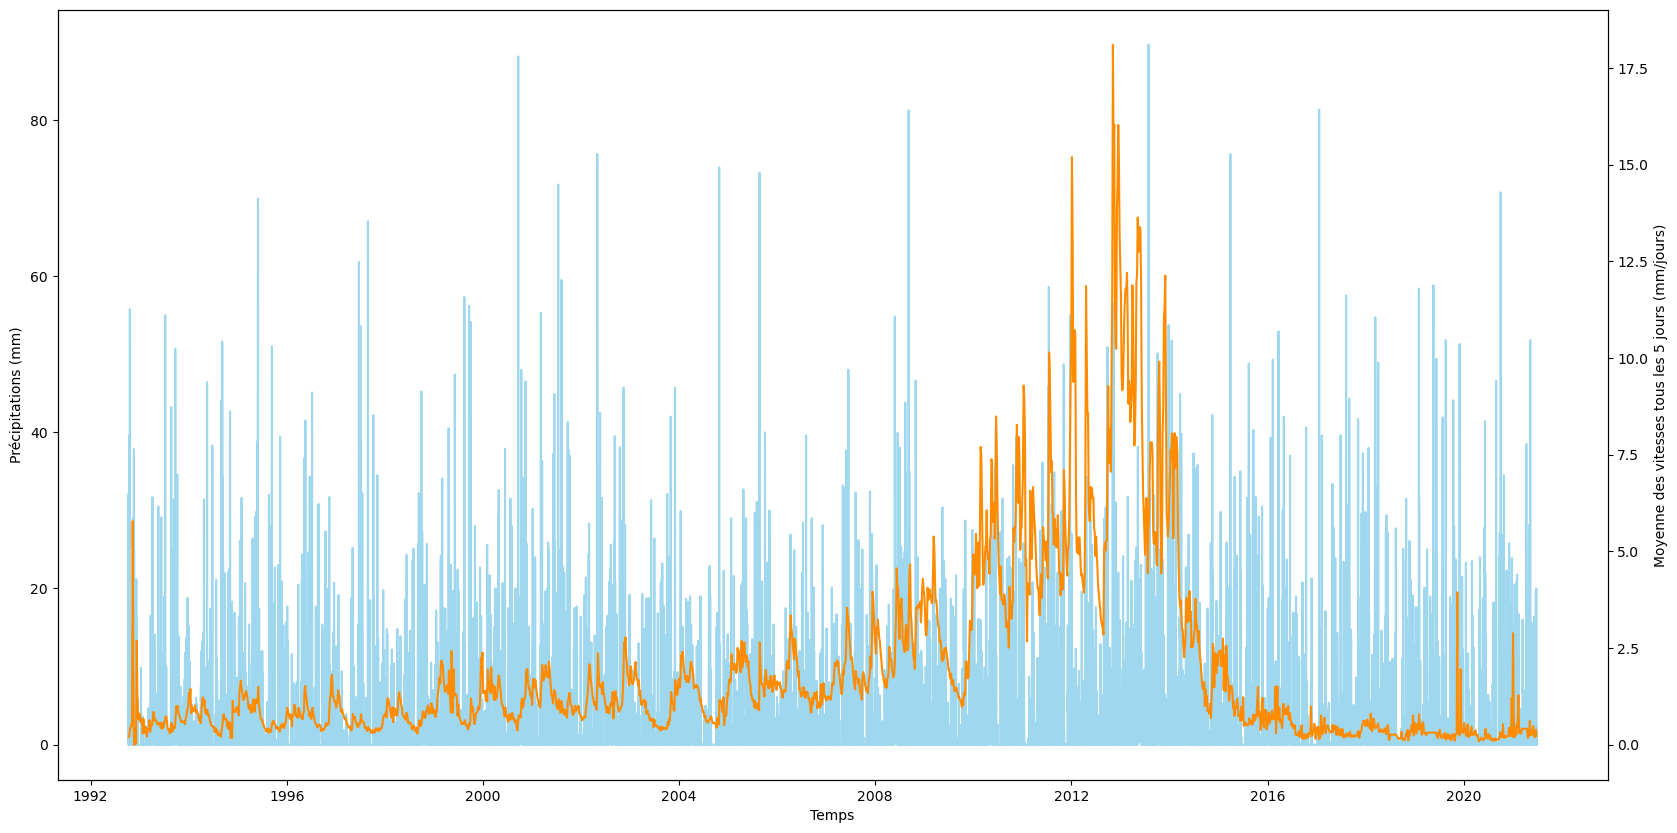

In [44]:
# Visualisation des vitesses MA avec pluie brute

fig, ax1 = plt.subplots(figsize = (20,10))

ax1.plot(data['pluie_brute'], label = 'Pluie brute', color = 'skyblue', alpha=0.8)
ax1.set_xlabel('Temps')
ax1.set_ylabel('Précipitations (mm)')

ax2 = ax1.twinx()

ax2.plot(data['vitesse'].rolling(window=5, center=True, step=5).mean(), label='Vitesse', color='darkorange')
ax2.set_ylabel('Moyenne des vitesses tous les 5 jours (mm/jours)')

plt.show()

In [45]:
# Accéder à un array des valeurs de vitesse de dimension 10495 x 1

vitesse = np.array(data['vitesse'])

print(vitesse.shape)
print(vitesse)

(10495,)
[0.25 0.25 0.8  ... 0.17 0.35 0.  ]


In [52]:
# Accéder à un array des valeurs de vitesse de moving average de dimension 10495 x 1

vitesse_ma = np.array(data['vitesse'].rolling(window=5, center=True, step=5).mean())

print(vitesse_ma.shape)
print(vitesse_ma)

(2099,)
[  nan 0.2   0.24  ... 0.196 0.388 0.232]


## PLUIE

In [47]:
# Array des valeurs de pluie brute

Pluie = np.array(data['pluie_brute'])
Pluie.shape

features=[]

In [48]:
# Division des valeurs de pluie par tranche de 5 jours (diviseur de 10495)

for x in range(0, len(Pluie),5):
    list=Pluie[x:x+5]
    print(list)
    
    a = pyc.catch22_all(list, catch24=True)
    features.append(a['values'])

[ 4.7  1.9  0.1  0.7 32.1]
[0.  0.3 0.  0.  0. ]
[ 5.2 39.6  0.   9.7 55.7]
[17.5  0.   2.7  2.6 10.4]
[ 5.4  5.7  7.  15.1 13.3]
[7.4  0.97 0.33 0.   0.1 ]
[0. 0. 0. 0. 0.]
[ 5.4  13.    0.    6.77  0.  ]
[29.03 18.37 10.47  1.57 37.83]
[ 9.93 24.83  0.17  1.    0.43]
[0.   7.2  0.03 0.5  0.17]
[ 0.    0.    0.2  13.37  3.43]
[16.07  0.   21.17  6.9   0.  ]
[1.27 0.5  3.3  4.17 0.  ]
[1.83 6.   0.   0.   0.  ]
[0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0.]
[0.   0.   9.83 2.3  2.67]
[0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0.]
[0.  3.6 0.  0.  2. ]
[0.83 0.07 0.   0.   0.  ]
[0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0.]
[0.   0.   0.   2.27 0.  ]
[0.   0.   0.67 1.33 0.  ]
[0.83 0.   1.33 0.63 0.  ]
[0.   0.   4.   4.73 0.  ]
[0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0.]
[ 0.    0.    1.9   1.1  16.53]
[0.17 0.   0.   0.   0.  ]
[0. 0. 0. 0. 0.]
[ 1.57 13.17 25.7  31.67  2.8 ]
[ 0.1  12.53  2.33  1.23  0.5 ]
[1.2 5.5 0.  0.  0. ]
[0.  0.3 0.  0.  0. ]
[ 3.5 14.1  5.6  0.   0. ]
[0.

[0.  0.  0.9 3.5 0. ]
[33.4  0.   9.6 14.1  6.4]
[53.7  0.   2.1 11.   0. ]
[ 0.   0.3  7.5  7.5 11.3]
[26.7 12.5  0.   7.9 38.1]
[ 0.   0.   0.   0.  21.4]
[ 0.   0.   5.4 51.7  0. ]
[ 1.9  0.   0.   1.7 29.4]
[0.  0.1 1.9 3.9 0. ]
[4.4 0.  1.  0.  7.3]
[ 0.   4.   0.   0.7 20.5]
[2.6 6.2 4.  0.  4.6]
[ 1.4  3.4 19.1 35.9  0. ]
[0.  5.7 2.7 8.5 0. ]
[0.  0.2 1.6 8.7 0. ]
[0.  0.  2.7 2.9 0. ]
[8.  0.  4.9 0.  5.5]
[3.  8.4 0.  9.7 4.5]
[ 6.4 16.2 15.4 13.8 15.1]
[44.9  0.  21.   0.   0. ]
[ 1.3  5.4  0.   4.  39.8]
[0. 0. 0. 0. 0.]
[1.4 7.6 0.  0.  9.6]
[0. 0. 0. 0. 0.]
[0.  0.  0.  0.  0.2]
[0.  0.4 2.8 3.6 0.1]
[0.3 5.4 5.4 1.9 0.6]
[ 8.9  1.5  2.5 22.2 22.7]
[ 0.   0.   2.7 13.1  0. ]
[0.  0.  3.3 0.6 4.4]
[0. 0. 0. 0. 0.]
[ 0.   0.   0.  23.3 26.9]
[ 0.7  0.3 13.1 13.5  0. ]
[0.  1.8 0.1 0.  0. ]
[0.  6.3 0.1 0.  0. ]
[ 0.   0.9 16.4  0.   0. ]
[0.  0.  1.2 0.  5.1]
[1. 0. 0. 0. 0.]
[3.1 2.6 0.  0.  0. ]
[ 0.3 37.3  2.5  1.5  3.3]
[ 0.   7.8  2.7  1.9 20.4]
[19.7 26.  12.7  2.  31

In [51]:
# Définition des features en array

features = np.array(features)
print(features.shape)
print(features)

(2099, 24)
[[-0.3371615  -0.45443506  0.59079595 ...  1.69650592  7.9
  13.64331338]
 [-0.2236068  -0.3354102   0.48624658 ...  0.          0.06
   0.13416408]
 [-0.67763262 -0.79221713  0.46837203 ...  1.29463016 22.04
  24.3052052 ]
 ...
 [-0.32193795 -0.43724196  0.58729429 ...  1.73827837  2.42
   4.37972602]
 [ 0.08174978  1.00143478  0.42179543 ...  1.45477986  9.2
   9.78595933]
 [-0.29192018 -0.40660311  0.51464683 ...  0.29488391  0.5
   0.9591663 ]]


## APPLICATION DU MODELE

In [54]:
# Importation des modules

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
import sklearn.metrics

In [ ]:
# Mise en place du RF

regr = RandomForestRegressor(1000) # Entrainement du modèle